In [1]:
import pandas as pd
import pandas_datareader as pdr

In [2]:
ts = pdr.av.time_series.AVTimeSeriesReader('EURUSD', api_key='your_api_key')
df = ts.read()
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')

In [3]:
df = df.drop('volume', axis=1)

In [4]:
split_date = '2023-07-31'
df_for_learning = df[df.index <= split_date].copy()
df_for_checking = df[df.index > split_date].copy()

In [5]:
df_for_learning['body'] = (df_for_learning['open'] - df_for_learning['close']).abs()
df_for_learning['shadow'] = df_for_learning['high'] - df_for_learning['low']
df_for_learning['bull_or_bear'] = (df_for_learning['open'] < df_for_learning['close']).astype(int) * 2 - 1

df_for_learning['prediction'] = df_for_learning['close'].shift(-1)
df_for_learning = df_for_learning.iloc[:-1]

In [6]:
df_for_learning

,open,high,low,close,body,shadow,bull_or_bear,prediction
2004-06-25,1.2162,1.2188,1.2103,1.2150,0.0012,0.0085,-1,1.2183
2004-06-28,1.2137,1.2228,1.2117,1.2183,0.0046,0.0111,1,1.2078
2004-06-29,1.2185,1.2194,1.2065,1.2078,0.0107,0.0129,-1,1.2172
2004-06-30,1.2079,1.2173,1.2062,1.2172,0.0093,0.0111,1,1.2169
2004-07-01,1.2189,1.2209,1.2129,1.2169,0.0020,0.0080,-1,1.2321
...,...,...,...,...,...,...,...,...
2023-07-24,1.1131,1.1147,1.1060,1.1063,0.0068,0.0087,-1,1.1057
2023-07-25,1.1062,1.1087,1.1020,1.1057,0.0005,0.0067,-1,1.1087
2023-07-26,1.1057,1.1107,1.1038,1.1087,0.0030,0.0069,1,1.0976
2023-07-27,1.1087,1.1150,1.0964,1.0976,0.0111,0.0186,-1,1.1015


In [7]:
df_for_checking['body'] = (df_for_checking['open'] - df_for_checking['close']).abs()
df_for_checking['shadow'] = df_for_checking['high'] - df_for_checking['low']
df_for_checking['bull_or_bear'] = (df_for_checking['open'] < df_for_checking['close']).astype(int) * 2 - 1

In [8]:
df_for_checking

,open,high,low,close,body,shadow,bull_or_bear
2023-08-01,1.0997,1.1019,1.0951,1.1018,0.0021,0.0068,1
2023-08-02,1.1018,1.1018,1.0917,1.0938,0.0080,0.0101,-1
2023-08-03,1.0938,1.0963,1.0911,1.0948,0.0010,0.0052,1
2023-08-04,1.0947,1.1042,1.0934,1.1007,0.0060,0.0108,1
2023-08-07,1.1011,1.1014,1.0964,1.1003,0.0008,0.0050,-1
2023-08-08,1.1003,1.1011,1.0928,1.0954,0.0049,0.0083,-1
2023-08-09,1.0954,1.0995,1.0950,1.0976,0.0022,0.0045,1
2023-08-10,1.0976,1.1065,1.0966,1.0980,0.0004,0.0099,1
2023-08-11,1.0983,1.1005,1.0942,1.0944,0.0039,0.0063,-1
2023-08-14,1.0947,1.0960,1.0875,1.0905,0.0042,0.0085,-1


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df_for_learning[['open', 'body', 'shadow', 'bull_or_bear']]
Y = df_for_learning['prediction']

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, shuffle=False, train_size=0.8)

In [12]:
from sklearn import linear_model

In [13]:
ols = linear_model.LinearRegression()
ols.fit(X_train, Y_train)

LinearRegression()

In [14]:
print('Coefficients: \n', ols.coef_)

Coefficients: 
 [ 0.996975   -0.02808964 -0.03142274  0.00516997]


In [15]:
from sklearn.metrics import r2_score

Y_prediction = ols.predict(X_train)
r2 = r2_score(Y_train, Y_prediction)

print('R-squared score:', r2)

R-squared score: 0.9942401291443904


In [16]:
def format_to_4_decimals(value):
    return round(value, 4)

df_for_checking['checking_prediction'] = ols.predict(df_for_checking[['open', 'body', 'shadow', 'bull_or_bear']])
df_for_checking['checking_prediction'] = df_for_checking['checking_prediction'].shift(1)
df_for_checking['checking_prediction'] = df_for_checking['checking_prediction'].apply(format_to_4_decimals)

df_for_checking['checking_prediction'] = df_for_checking['checking_prediction'].fillna(df_for_checking['close'])

In [17]:
df_for_checking

,open,high,low,close,body,shadow,bull_or_bear,checking_prediction
2023-08-01,1.0997,1.1019,1.0951,1.1018,0.0021,0.0068,1,1.1018
2023-08-02,1.1018,1.1018,1.0917,1.0938,0.0080,0.0101,-1,1.1055
2023-08-03,1.0938,1.0963,1.0911,1.0948,0.0010,0.0052,1,1.0970
2023-08-04,1.0947,1.1042,1.0934,1.1007,0.0060,0.0108,1,1.0997
2023-08-07,1.1011,1.1014,1.0964,1.1003,0.0008,0.0050,-1,1.1003
2023-08-08,1.1003,1.1011,1.0928,1.0954,0.0049,0.0083,-1,1.0967
2023-08-09,1.0954,1.0995,1.0950,1.0976,0.0022,0.0045,1,1.0957
2023-08-10,1.0976,1.1065,1.0966,1.0980,0.0004,0.0099,1,1.1013
2023-08-11,1.0983,1.1005,1.0942,1.0944,0.0039,0.0063,-1,1.1034
2023-08-14,1.0947,1.0960,1.0875,1.0905,0.0042,0.0085,-1,1.0938


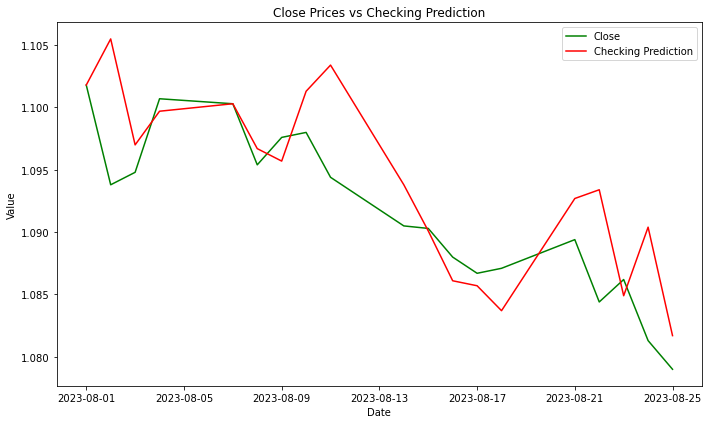

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(df_for_checking.index, df_for_checking['close'], label='Close', color='green')

plt.plot(df_for_checking.index, df_for_checking['checking_prediction'], label='Checking Prediction', color='red')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Close Prices vs Checking Prediction')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
initial_investment = 10000

df_for_checking['units'] = initial_investment / df_for_checking['checking_prediction']
df_for_checking['value_change'] = df_for_checking['units'] * (df_for_checking['close'] - df_for_checking['checking_prediction'])
total_value_change = df_for_checking['value_change'].sum()
overall_balance = initial_investment + total_value_change

print("Initial Investment: {:.2f}".format(initial_investment))
print("Total Value Change: {:.2f}".format(total_value_change))
print("Overall Balance: {:.2f}".format(overall_balance))

Initial Investment: 10000.00
Total Value Change: -402.04
Overall Balance: 9597.96
